In [1]:
import pandas as pd
import numpy as np

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import jaccard_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cancer patient data sets.csv')

In [3]:
data

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
data.shape

(1000, 25)

In [5]:
data.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

## No null values are there

In [27]:
x = data.drop(columns=['Level','Patient Id'],axis =1)
y = data['Level']

In [28]:
y.shape,x.shape

((1000,), (1000, 23))

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

DOing label encoding to Label

In [29]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
y[:]=label_encoder.fit_transform(y[:]).astype(int)
y=y.astype(int)

C:\Users\krishnendu\AppData\Local\Temp\ipykernel_23480\1707772296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[:]=label_encoder.fit_transform(y[:]).astype(int)


In [30]:
y.unique()

array([1, 2, 0])

<AxesSubplot:>

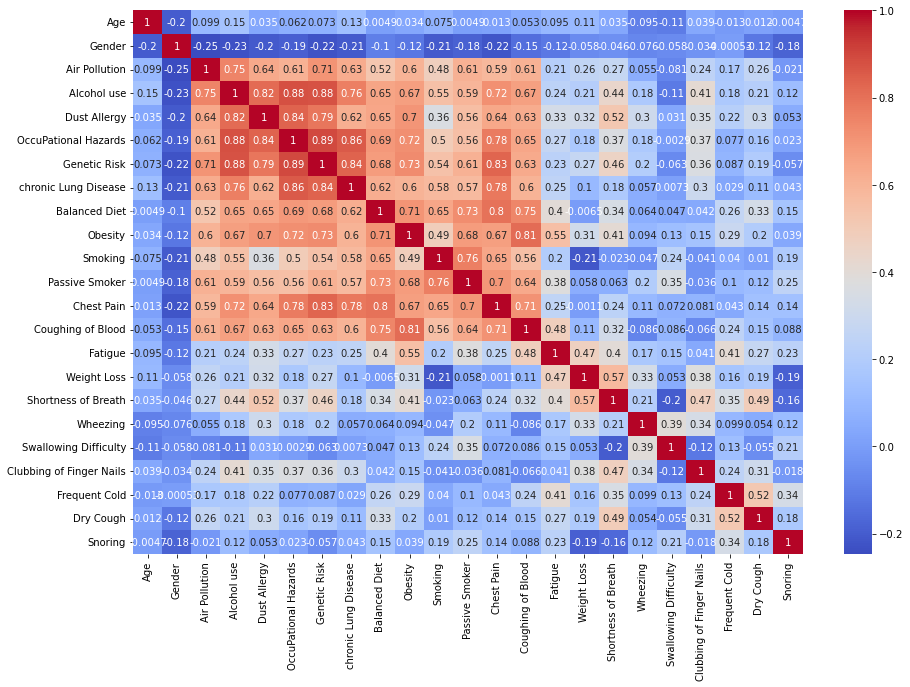

In [45]:
plt.figure(figsize = (15,10))
sns.heatmap(x.corr(),annot=True,cmap='coolwarm')

In [47]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 23) (800,)
Test set: (200, 23) (200,)


In [55]:
for kernel in ['linear','poly','sigmoid','rbf']:
    model = svm.SVC(kernel=kernel).fit(x_train, y_train)
    pred=model.predict(x_test)
    print('The classification report of svm of kernel =',kernel,'is :\n')
    print(classification_report(pred,y_test),'\n')
    print("Avg F1-score: %.4f" % f1_score(y_test, pred, average='weighted',zero_division="warn"))
    print("Jaccard score: %.4f" % jaccard_score(y_test, pred, average='micro'))
    print("Accuracy Score : %0.2f"% accuracy_score(y_test,pred),'\n')

The classification report of svm of kernel = linear is :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200
 

Avg F1-score: 1.0000
Jaccard score: 1.0000
Accuracy Score : 1.00 

The classification report of svm of kernel = poly is :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       0.93      0.88      0.90        58
           2       0.90      0.94      0.92        65

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200
 

Avg F1-score: 0.9451
Jaccard score: 0.8957
Accuracy S

C:\Users\krishnendu\Desktop\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krishnendu\Desktop\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krishnendu\Desktop\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Best kernal is linear

Try another Algorithms

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [75]:
def FitModel (X,Y, algo_name , algorithm, gridSearchParams, cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size = 0.2)
    
    # Find the Parameters , then choose best parameters 

    grid = GridSearchCV(estimator = algorithm, param_grid = gridSearchParams,
                        cv = cv, scoring = 'accuracy', verbose = 1 , n_jobs = -1 )
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict (x_test)
    cm = confusion_matrix (y_test,pred)
    
    print (pred)
    #pickle.dump(grid_result,open(algo_name,'wb'))
    
    print ('Best Params :', best_params)
    print ('Classification Report:',classification_report(y_test,pred))
    print ('Accuracy Score', (accuracy_score(y_test,pred)))
    print ('Confusion Matrix :\n',cm)

In [76]:
#cv = cross validation 
param = {
            'n_estimators': [100,1000],
         }

FitModel (x,y,'Random forest',RandomForestClassifier(), param, cv =10)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[2 0 0 1 0 2 0 2 0 2 0 2 2 1 1 2 0 1 0 1 0 1 0 0 0 2 2 1 1 2 1 2 0 1 2 0 2
 0 2 1 2 2 0 2 0 0 1 0 0 2 2 2 2 0 2 0 0 0 1 0 0 1 0 1 0 1 2 0 0 2 1 1 1 2
 2 2 2 2 0 1 0 1 0 2 0 0 0 2 1 0 2 2 1 1 2 2 2 2 2 1 0 2 1 0 1 1 1 2 0 0 1
 0 2 1 1 0 2 2 1 1 0 0 0 2 1 0 0 1 1 2 2 0 1 0 1 1 1 0 1 0 2 1 2 2 1 1 2 0
 1 1 0 1 2 2 2 0 1 0 0 1 1 2 1 2 1 0 2 1 2 1 0 2 0 1 0 2 2 2 2 2 2 1 1 2 2
 0 0 0 0 2 2 1 1 0 0 1 2 2 1 2]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy Score 1.0
Confusion Matrix :
 [[67  0  0]
 [ 0 62  0]
 [ 0  0 71]]


In [80]:
pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 89.1/89.1 MB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\users\krishnendu\desktop\sample_project\env\lib\site-packages (from xgboost) (1.7.3)



In [81]:
from xgboost import XGBClassifier

In [83]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (x, y,'XGBoost', XGBClassifier(),param, cv = 10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[2 0 0 1 0 2 0 2 0 2 0 2 2 1 1 2 0 1 0 1 0 1 0 0 0 2 2 1 1 2 1 2 0 1 2 0 2
 0 2 1 2 2 0 2 0 0 1 0 0 2 2 2 2 0 2 0 0 0 1 0 0 1 0 1 0 1 2 0 0 2 1 1 1 2
 2 2 2 2 0 1 0 1 0 2 0 0 0 2 1 0 2 2 1 1 2 2 2 2 2 1 0 2 1 0 1 1 1 2 0 0 1
 0 2 1 1 0 2 2 1 1 0 0 0 2 1 0 0 1 1 2 2 0 1 0 1 1 1 0 1 0 2 1 2 2 1 1 2 0
 1 1 0 1 2 2 2 0 1 0 0 1 1 2 1 2 1 0 2 1 2 1 0 2 0 1 0 2 2 2 2 2 2 1 1 2 2
 0 0 0 0 2 2 1 1 0 0 1 2 2 1 2]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy Score 1.0
Confusion Matrix :
 [[67  0  0]
 [ 0 62  0]
 [ 0  0 71]]


# So Any of the Algorithms can be used for this classification 
## for SVC the kernal should be linear